<a href="https://colab.research.google.com/github/dinabandhuk/ml-project/blob/main/Deep_learning_with_pytorch_stevens%2C_antiga%2C_viehemen_manning_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deep learning with pytorch . stevens antiga viehemen, manning 2020
ISBN : 9781617295263


In [4]:
! pip install pytorch torchvision

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12

In [1]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
models.resnet

Intermediate representations are instrumental in capturing the features of data. Each intermediate representation is unique to the inputs that preceded it.
## Tensors
In the context of deep learning tensors are generalization of matrices and vectors to arbritary number of dimensions unlike the tensors in mathematics, physics and engineering.
They can therefore be called *multidimensional arrays*.
- pytorch tensors are 32 bit unboxed C numeric types and not python objects.

Tensors are therefore much more memory efficient.\
![box vs unboxed](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Z6rR1n0Om_WmqakWgd-4og.png)

- indexing and slicing is same as in other python libraries
- also has *advanced indexing* which we will cover later.

---

### Named Tensors

- we want to be able to name and keep track of tensors in complex networks
- makes operations much easier and generalizable\
- See also\
[vector broadcasting in pytorch and other numeric libraries](https://www.youtube.com/watch?v=4Ehb_is-MFU)

- **vector broadcasting** makes linear algebra computations convenient in these numerical packages although the notation is not formal as in the textbook. The actual operations are done *implicitly* by the compute backend and the user only interacts with convenient **syntactic sugar**

---

## Tensor element types

- Python numbers are also objects with reference counting and so on which makes them inefficient.
- Pytorch and NumPY therefore implement all the heavy mathematical computations in optimized C and expose an API through python for convenience.\
*dtype* gives the data types of tensors of which there are many like float32 and int64 which are commmon and so on.

- Predicate on tensors like `point > 1.0` produce `bool` tensors which is another type.

---

## Tensor API

Operation category in pytorch tensors :
- Creation ops
- Indexing, slicing, joining, mutating
- Math
  - Pointwise
  - Reduction
  - Comparison
  - Other
  - BLAS / LAPACK
- Serialization
- Parallelism
- Random Sampling : set_num_threads

---

## Tensor storage

- **tensors are stored in contiguous chunks managed by torch.Storage** instances
- Indexing using Offsets and per dimension strides in an essentially one dimensional array.
- Different tensors can index the same storage so alternative views of tensor don't require extra memory and compute.

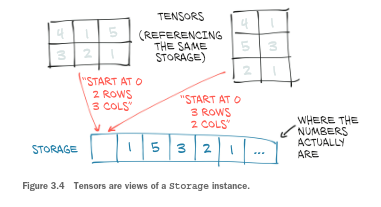

In [ ]:
import torch
points = torch.tensor([[1, 2], [3, 4], [5, 6]])
points.storage()
# This clearly demonstrates that tensors are stored as linear one dimensional
# arrays and that change in the underlying array will als change the value
# corresponding to the index of element in any tensor.

In [ ]:
# In place operations have trailing underscore attached
# zero_() zeroes out tensors in place

a = torch.ones(3, 4)
print(a)
a.zero_()
print(a)

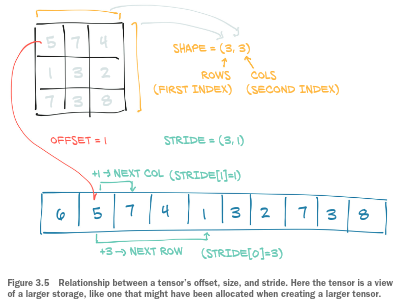

In [3]:
import torch
points = torch.tensor([[1, 2], [3, 4], [5, 6]])
points.stride()

(2, 1)

stride is a tuple. \
To access `i,j` th element in a 2D tensor: \
`storage_offset + stride[0]*i + stride[1] * j`
offset is usually 0.

- We can also transpose tensors in higher dimensions.

In [ ]:
# transfer from CPU to GPU
points_gpu = points.to(device='cuda')

## Numpy interpoerability

Pytorch and NumPy are compatible because of `Python Buffer protocol`.
One caveat is that the tensors/arrays are allocated on the CPU (copied to CPU if in GPU) RAM.\

----

## Generalized Tensors

`dispatching` mechanism ensures that the internal implementation of tensors can be different based on the platform or device (CPU vs GPU vs TPU for example).\
Pytorch dispatcher is one of the important parts.

## Tensor serialization
pytorch uses `pickle` to save and load tensors.
```python
torch.load('/path/to/file/tensorfile.t')
```

```python
torch.save(points, '/path/to/save/file.t')
```

Pytorch tensor files can only be opened and written to by pytorch so for interoperability we can use HDF5.

### HDF5 with h5py



# Chapter 4 : Real world Data representation using tensors

Keep in mind the nature of
- Ratio scale : a is 2 times b
- Interval scale : 3:00 pm minus 6:00 pm
- Ordinal scale : some kind of arbitary mapping like, small=1, average=2, medium=3.

- Nominal scale:  has categorical values : arbritary mapping like, water=1, milk=2, juice=3, etc, the numbers have no meaning. Assigning numbers 0...N-1 has advantages for one hot encoding

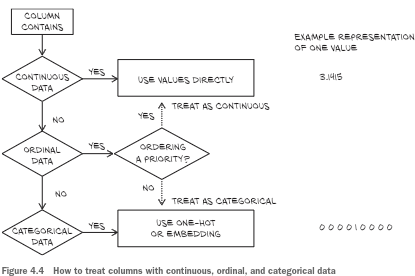